In [230]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd 
import numpy as np 

In [231]:
data=pd.read_csv('data.csv', parse_dates=True)

In [232]:
data['Rychlost_sirenia_%']=data['Rychlost_sirenia_%'].apply(lambda x: x*100)

In [236]:
data.describe()

,Aktivni_celkom,Rychlost_sirenia_%,Sila_sirenia
count,70.000000,70.000000,70.000000
mean,47.209714,35.185714,28.696143
std,47.372068,42.925717,28.856307
min,0.450000,-61.000000,0.130000
25%,6.177500,6.250000,3.710000
50%,35.475000,27.000000,21.280000
75%,74.800000,57.750000,47.767500
max,167.780000,150.000000,105.000000


In [244]:
data['Date']=pd.to_datetime(data['Date'], errors='coerce')
data=data.sort_values(by=['Date'])
data['Date']=data.Date.apply(lambda x: x.date()).apply(str)

In [245]:
data

,Date,Region,Aktivni_celkom,Rychlost_sirenia_%,Sila_sirenia
69,2020-09-26,Uherské Hradište,15.61,5.0,8.04
56,2020-09-26,Tvrdošín,16.11,6.0,10.08
57,2020-09-26,Námestovo,13.73,5.0,8.32
58,2020-09-26,Bardejov,12.59,5.0,7.54
59,2020-09-26,Dolný Kubín,13.93,11.0,9.45
...,...,...,...,...,...
11,2020-10-24,Bratislava,21.23,15.0,11.36
12,2020-10-24,Praha,117.42,124.0,71.35
13,2020-10-24,Uherské Hradište,162.60,49.0,83.79
7,2020-10-24,Čadca,53.33,133.0,37.33


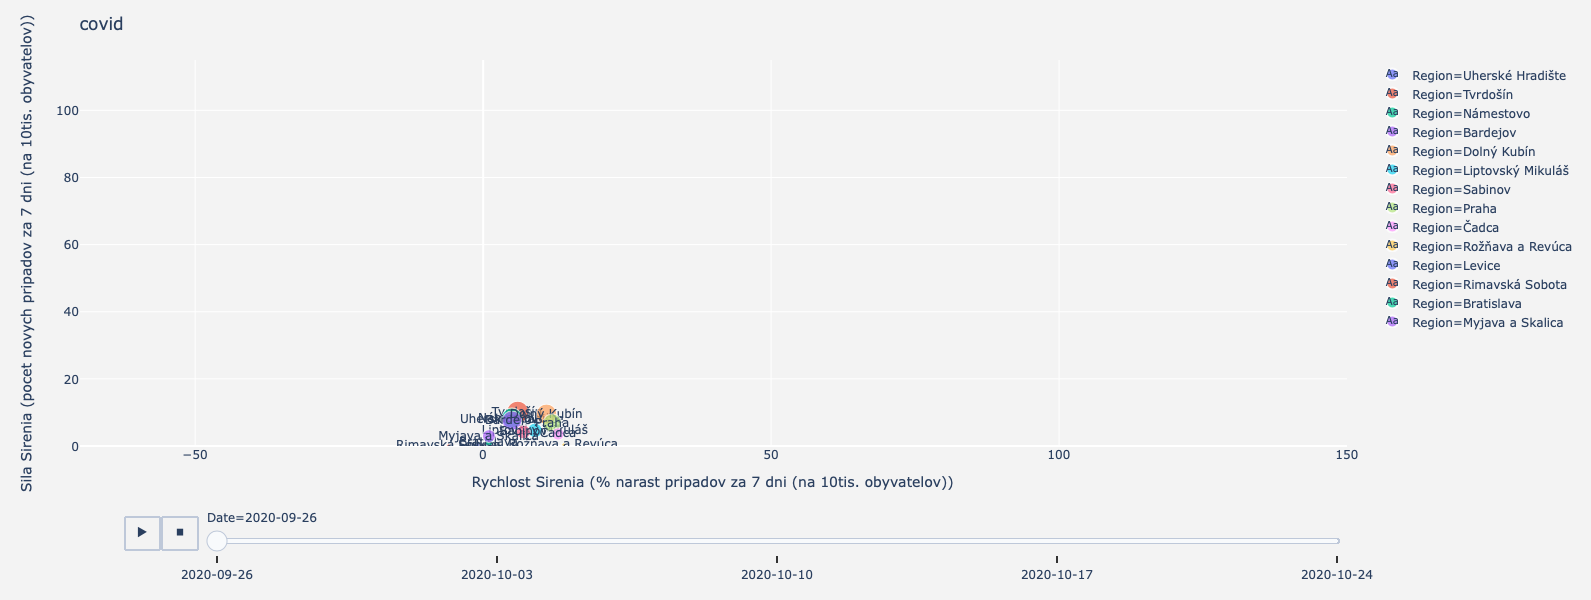

In [246]:
fig = px.scatter(data,x='Rychlost_sirenia_%', y='Sila_sirenia',text='Region', animation_frame='Date',
                 animation_group='Region',size='Aktivni_celkom', 
                 color='Region',
                 hover_name='Region', log_x=False, 
                 size_max=50, range_x=[-70,150], range_y=[0,115]
                )

fig.update_traces(mode='markers', marker=dict(sizemode='area',))
fig.update_layout(
    title='covid',
    xaxis=dict(
        title='Rychlost Sirenia (% narast pripadov za 7 dni (na 10tis. obyvatelov))',
        gridcolor='white',
#         type='log',
        gridwidth=1,
    ),
    yaxis=dict(
        title='Sila Sirenia (pocet novych pripadov za 7 dni (na 10tis. obyvatelov))',
        gridcolor='white',
        gridwidth=1,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 700
fig.show()

In [ ]:
#https://plotly.com/python/animations/